# HEART -DISEASE PREDICTION

## DATASET 
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

**INFO ABOUT DATA**

In [2]:
!jupyter --version


Selected Jupyter core packages...
IPython          : 8.15.0
ipykernel        : 6.25.0
ipywidgets       : 8.0.4
jupyter_client   : 7.4.9
jupyter_core     : 5.5.0
jupyter_server   : 1.23.4
jupyterlab       : 3.6.3
nbclient         : 0.8.0
nbconvert        : 7.10.0
nbformat         : 5.9.2
notebook         : 6.5.4
qtconsole        : 5.4.2
traitlets        : 5.7.1


In [3]:
#BASIC LIBRARY 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#THIS PLOTS GRAPH IN THE NOTEBOOK 

%matplotlib inline                    



#MODEL IMPORTS

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#MODEL MANUPULATION AND EVALUTION IMPORTS

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import recall_score,precision_score,f1_score
from sklearn.metrics import RocCurveDisplay,auc,roc_curve


# 1.  EDA

In [4]:
data=pd.read_csv("heart-disease.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.isna().sum()              #NO NULL VALUES IN OUR DATA :)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
data.dtypes                      #WE HAVE ALL NUMERIC DATA :) 

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
data["target"].value_counts()            #CHEACKING WETHER WE HAVE A IMBALANCED CLASS OR NOT  looks like we don't :) 

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

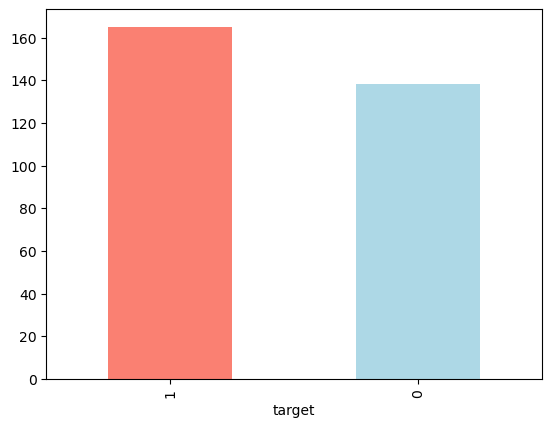

In [9]:

data["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]) 

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
pd.crosstab(data['target'],data["sex"])              #COMPARING TWO COLOUMN (here sex 0 : female patients)
                                                                            #(    sex 1 : male patients)

sex,0,1
target,,
0,24,114
1,72,93


Text(0, 0.5, 'Number of patients')

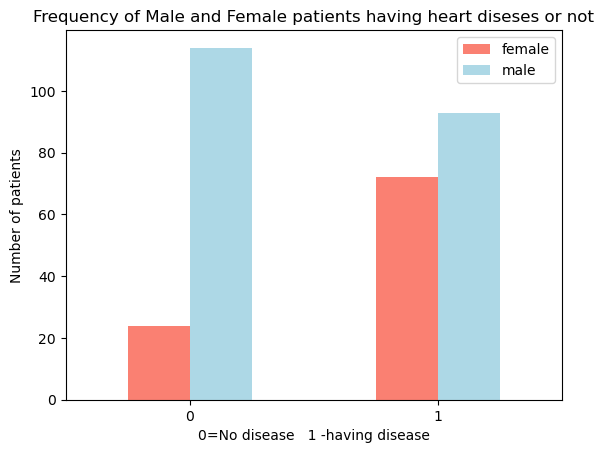

In [12]:
#COMPARING SEX(GENDER) AND TARGET 

pd.crosstab(data["target"],data["sex"]).plot(kind="bar",color=["salmon","lightblue"])
plt.legend(["female","male"])
plt.title("Frequency of Male and Female patients having heart diseses or not");
plt.xticks(rotation=0)
plt.xlabel("0=No disease   1 -having disease")
plt.ylabel("Number of patients")



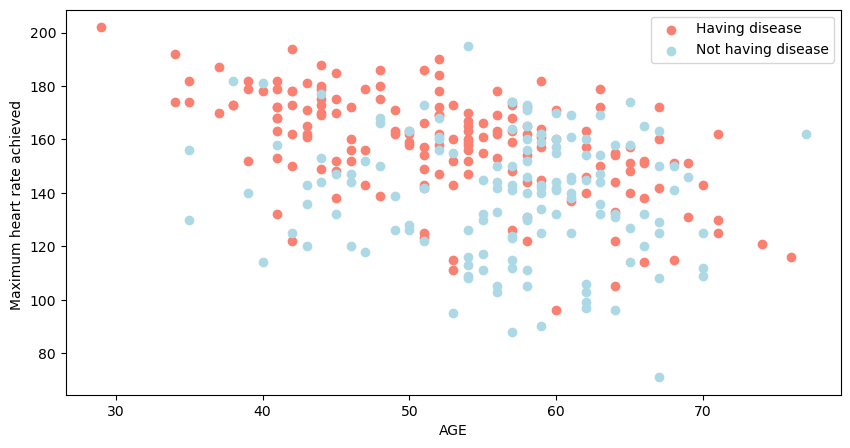

In [13]:
#COMPARING AGE VS MAX HEART RATE

#plotting values having disease
plt.figure(figsize=(10,5))
plt.scatter(data.age[data.target==1],data.thalach[data.target==1],c="salmon");


#plotting values not having disease
plt.scatter(data.age[data.target==0],data.thalach[data.target==0],c="lightblue")


#labels
plt.xlabel("AGE")
plt.ylabel("Maximum heart rate achieved ")
plt.legend(["Having disease","Not having disease"]);



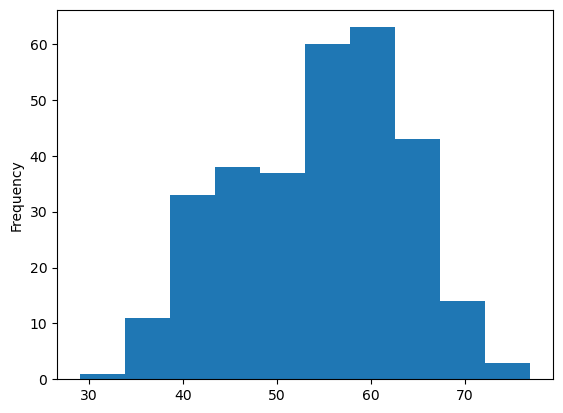

In [14]:
data.age.plot.hist();                      # we can observe that most of our data has patients having age around 45 to 60

In [15]:
corr_matrix=data.corr()   # This is corelation matrix

In [16]:
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


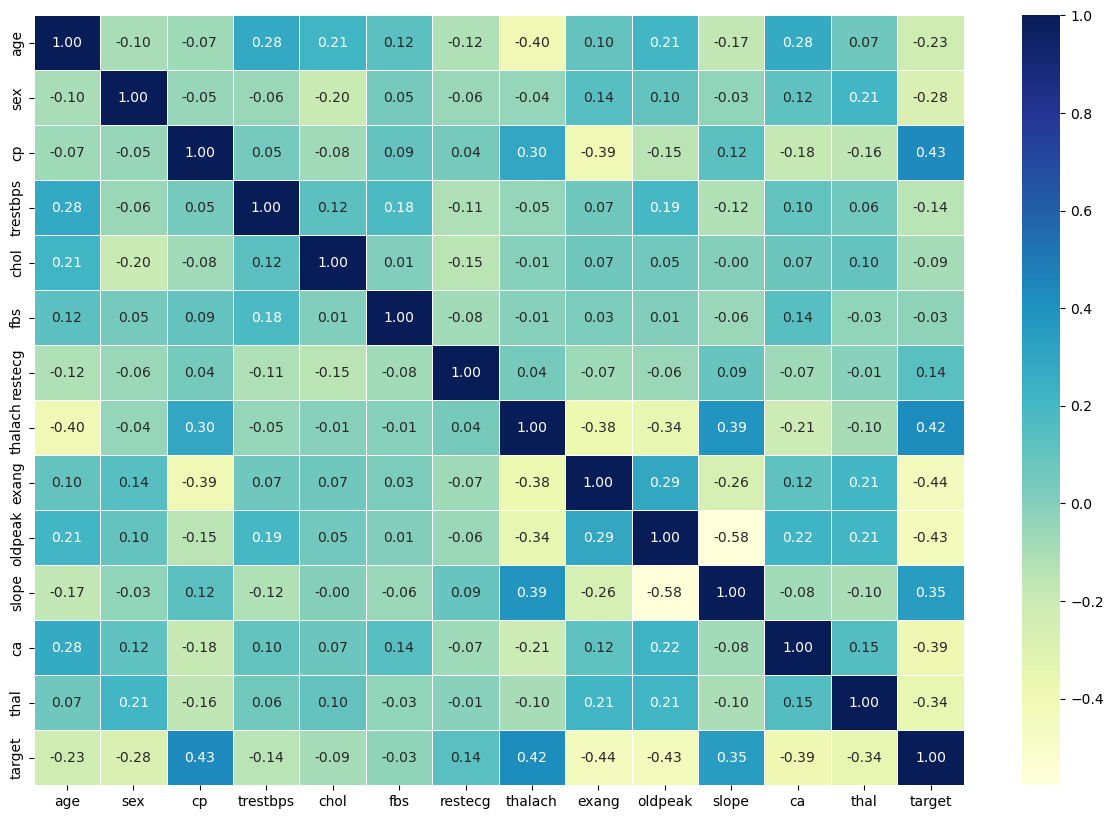

In [17]:
#HEAT MAP GIVES CORRELATION BETWEEN DIFFERENT ROWS

fig, ax = plt.subplots(figsize=(15,10))
ax =sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap='YlGnBu')

# 2. Model Building 

In [18]:
#SPLITING THE DATA
np.random.seed(55)                       #HELPS TO GET THE SAME VALUE OF RANDOM VARIBLES 

X=data.drop("target",axis=1)             # GETTING OUR FEATURES

y=data["target"]                         # GETTING OUR PREDICTION VALUE (LABEL)

x_train, x_test, y_train, y_test=train_test_split(X ,y, test_size=0.2)   # SPLITING OUR DATA FOR TRAINING AND TESTING 


In [19]:
model={"Logistic Regression":LogisticRegression(),
       "KNN":KNeighborsClassifier(),
       "Randomforestclassifier":RandomForestClassifier()}   #WE WOULD BE COMPARING THESE MODEL


def fit_and_score_models(models,x_train,x_test,y_train,y_test):
    
    models_score={}
    
    for key, value in models.items():
        
        value.fit(x_train,y_train)
        models_score[key]=value.score(x_test,y_test)
        
    return models_score
        



In [20]:
scores=fit_and_score_models(model,x_train,x_test,y_train,y_test)   # we can get rid of this warning by changing the hyperparameters

C:\Users\blaze\sample_project\heart-diseases\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
scores

{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.7377049180327869,
 'Randomforestclassifier': 0.7868852459016393}

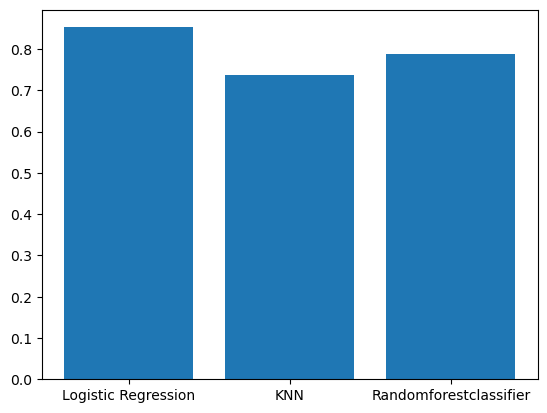

In [22]:
plt.bar(scores.keys(),scores.values());           #Logistic regression performs the best for now

In [23]:
import xgboost as xgb        # trying out  xgboost

In [24]:
xgb_classifier=xgb.XGBClassifier()

In [25]:
xgb_classifier.fit(x_train , y_train )

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [26]:
xgb_classifier.score(x_test, y_test)     # :(

0.7377049180327869

# HYPERPARAMETER TUNNING 


In [27]:
#MANUAL TUNNING


test_scores=[]

neigbours=range(1,21)

knn=KNeighborsClassifier()

for i in neigbours:
    knn.set_params(n_neighbors=i)
    
    knn.fit(x_train,y_train)
    
    test_scores.append(knn.score(x_test,y_test))
    
    

In [28]:
max(test_scores)

0.7377049180327869

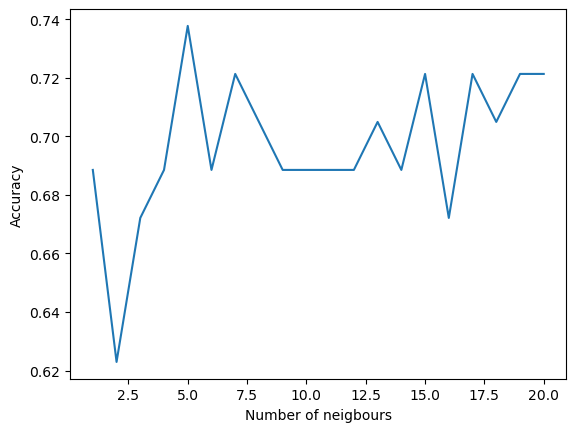

In [29]:
plt.plot(neigbours,test_scores);
plt.xlabel("Number of neigbours")
plt.ylabel("Accuracy");

In [30]:
#TUNNING USING RandomizedSearchCV


#DEFINING PARAMETERS GRIDS

log_res_grid={"C":np.logspace(-4,4,20),
              "solver":["liblinear"]}

rf_grid={"n_estimators":np.arange(10,100,50),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,3)}


In [31]:
np.random.seed(45)

# TUNNING USING RandomizeSearchCV

rs_log_res=RandomizedSearchCV(LogisticRegression() , log_res_grid , cv=5, n_iter=20,verbose=True )
rs_log_res.fit(x_train,y_train)


rs_rf=RandomizedSearchCV(RandomForestClassifier(), rf_grid , cv=5, n_iter=70, verbose=True)
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 70 candidates, totalling 350 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=70,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  4,  7, 10, 13, 16, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 60])},
                   verbose=True)

In [32]:
rs_log_res.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [33]:
rs_log_res.score(x_test,y_test)

0.8032786885245902

In [34]:
rs_rf.score(x_test,y_test)        # BEST SCORE SO FAR 

0.8688524590163934

In [35]:
# USING GridSearchCV 
log_res_grid2={"C":np.logspace(-4,4,37),
              "solver":["liblinear"]}
gs_log_res =GridSearchCV(LogisticRegression(),log_res_grid2,cv=5,verbose=True)

gs_log_res.fit(x_train,y_train)

gs_log_res.score(x_test,y_test)

Fitting 5 folds for each of 37 candidates, totalling 185 fits


0.819672131147541

In [36]:
gs_rf=GridSearchCV(RandomForestClassifier(),rf_grid,cv=5,verbose=True)

In [37]:
gs_rf.fit(x_train,y_train)

gs_rf.score(x_test,y_test)

Fitting 5 folds for each of 504 candidates, totalling 2520 fits


0.8524590163934426

# EVALUTING MODEL

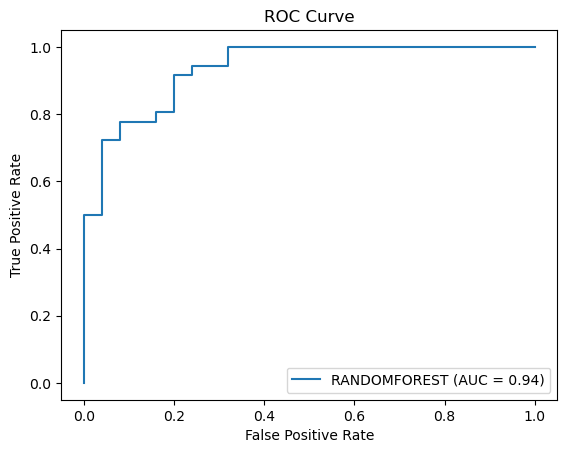

In [38]:
#USING THE BEST MODEL (rs_rf)


#PLOTTING A ROC CURVE


y_prob=rs_rf.predict_proba(x_test)[:,1]

y_preds=rs_rf.predict(x_test)



fpr,tpr,_=roc_curve(y_test,y_prob)
roc_auc=auc(fpr,tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='RANDOMFOREST')
display.plot()
plt.title('ROC Curve')
plt.show()




In [39]:
print(classification_report(y_test,y_preds))     #CLASSIFICATION REPORT 

              precision    recall  f1-score   support

           0       1.00      0.68      0.81        25
           1       0.82      1.00      0.90        36

    accuracy                           0.87        61
   macro avg       0.91      0.84      0.85        61
weighted avg       0.89      0.87      0.86        61



In [40]:
precision=precision_score(y_test,y_preds)

recall=recall_score(y_test,y_preds)

f1=f1_score(y_test,y_preds)

In [41]:
print(f'PRECISION SCORE- {precision}\nRECALL SCORE-{recall}\nF1_SCORE- {f1}')

PRECISION SCORE- 0.8181818181818182
RECALL SCORE-1.0
F1_SCORE- 0.9


In [44]:
metrics=pd.DataFrame({"precision":precision,
                      "recall":recall,
                      "f1":f1},index=[0])

<Axes: >

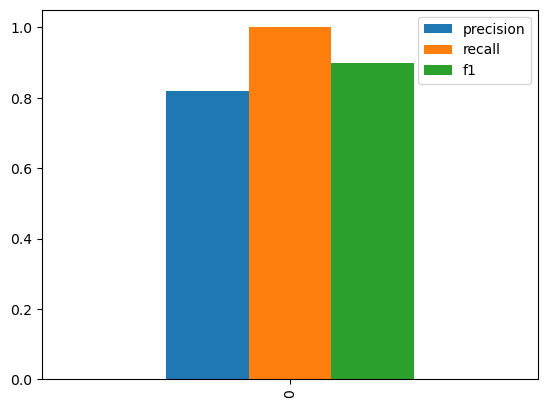

In [48]:
metrics.plot(kind="bar")

In [49]:
#IF WE DONT REACH OUR EVALUTION MECTRIC BENCHMARK 
# WE CAN ALSO TRY TO COLLECT MORE DATA 
# OR WE CAN TRY MORE MODELS SUCH AS Catboost or xgboost